In [63]:
# Set up infrastructure and basic problem parameters
import multiprocessing as mp
import numpy as np
import datetime, os
from ContNoRegret.Domains import nBox, UnionOfDisjointnBoxes, DifferenceOfnBoxes, unitbox, hollowbox
from ContNoRegret.LossFunctions import random_PolynomialLosses, random_AffineLosses, random_QuadraticLosses
from ContNoRegret.NoRegretAlgos import ContNoRegretProblem
from ContNoRegret.utils import CNR_worker, plot_results, save_results, circular_tour
from ContNoRegret.animate import save_animations
from ContNoRegret.Potentials import (ExponentialPotential, IdentityPotential, pNormPotential, CompositePotential,
                                        ExpPPotential, PExpPotential, HuberPotential, LogtasticPotential, FractionalLinearPotential)

import matplotlib.pyplot as plt
%matplotlib inline

tmpfolder = '/Volumes/tmp/'


Nloss = 100
T = 250 # Time horizon
M = 10.0 # Uniform bound on the function (in the dual norm)
L = 5.0 # Uniform bound on the Lipschitz constant
N = 2500 # Number of parallel algorithm instances
Ngrid = 250000 # Number of gridpoints for the sampling step
H = 0.1 # strict convexity parameter (lower bound on evals of Q)

dom = unitbox(4)
nus = [0.05, 0.25, 1]

lossfuncs = random_PolynomialLosses(dom, Nloss, M, L, 4, [0,1,2,3,4])
normbounds = {nu: [lossfunc.norm(2/nu, tmpfolder=tmpfolder) for lossfunc in lossfuncs] for nu in nus}
Ms = {nu: np.array(normbounds[nu]) for nu in nus}
MLs = np.array([lossfunc.max(grad=True) for lossfunc in lossfuncs])
Ms['inf'], Ls = MLs[:,0], MLs[:,1] 


In [64]:
Cs = {nu: 2*Ms[nu]/np.sqrt(nu*(1+nu)*dom.v**nu) + L*dom.diameter for nu in nus}
t = 1+np.arange(T)
bounds = {nu:np.array([C*t**(-1/(2+dom.n*nu)) for C in Cs[nu]]) for nu in nus}

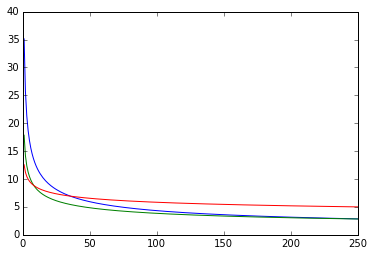

In [69]:
i = 8
plt.plot(t, bounds[0.05][i], t, bounds[0.25][i], t, bounds[1][i], )

In [77]:
def t_equal(M1, nu1, M2, nu2):
    c = lambda M, nu: 2*M/np.sqrt(nu*(1+nu)*dom.v**nu) + L*dom.diameter
    return (c(M2, nu2)/c(M1, nu1))**((2+dom.n*nu1)*(2+dom.n*nu2)/dom.n/(nu1-nu2))

In [78]:
t_equal(Ms[0.05][i], 0.05, Ms[0.25][i], 0.25)

265.20234626359877

In [66]:
np.argmin(Cs[1]/Cs[0.05])

8

In [60]:
Cs[1][34], Cs[0.05][34]

(12.410043228194782, 45.1001313559549)